## Loading libaries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Thesis_work'

Mounted at /content/drive
/content/drive/MyDrive/Thesis_work


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Thesis_work/Daraz Labelled Review Dataset with Sentiments and Features.xlsx')
df.drop(['Unnamed: 0',],axis=1,inplace=True)
df =  df.rename(columns={"Spam(1) and Not Spam(0)": "Label"}, errors="raise")
df['Reviews'].isnull().values.any()

False

In [ ]:

df['Reviews'].replace('0', np.nan, inplace=True)
df.dropna(subset=['Reviews'], inplace=True)
df['Reviews'].replace('0', np.nan, inplace=True)
df.dropna(subset=['Reviews'], inplace=True)
X = df.Reviews
y= df.Label
X.shape
df.head(2)


,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota']
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']"


#Basic EDA

In [ ]:
df['Label'].value_counts()

0    3393
1     530
Name: Label, dtype: int64

No handles with labels found to put in legend.


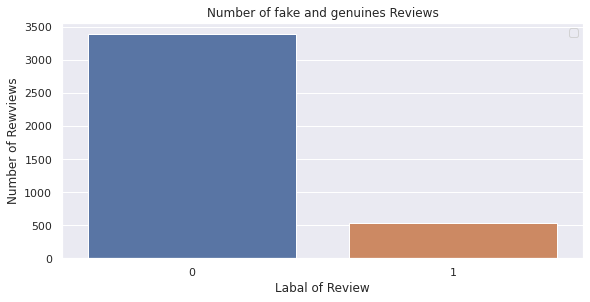

In [ ]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.countplot(x='Label',data=df,)
plt.legend(loc='upper right')
plt.xlabel('Labal of Review')
plt.ylabel('Number of Rewviews')
plt.title('Number of fake and genuines Reviews');
plt.tight_layout(pad = 0)
# plt.savefig("dataset.png")

The target class variable is imbalanced, where "ham" values are more dominating than "dataset".

In [ ]:
df.describe()

,Customer_ID,Rating,Label
count,3923.000000,3923.000000,3923.000000
mean,3657.730308,3.930665,0.135101
std,2209.149883,1.414497,0.341875
min,0.000000,1.000000,0.000000
25%,1716.500000,3.000000,0.000000
50%,3613.000000,5.000000,0.000000
75%,5538.000000,5.000000,0.000000
max,9596.000000,5.000000,1.000000


Length of text messages:

In [ ]:
df['length'] = df.Reviews.apply(len)
df.head()

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78
3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,2017-10-06,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",218
4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,2017-08-31,4,0,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle...",391


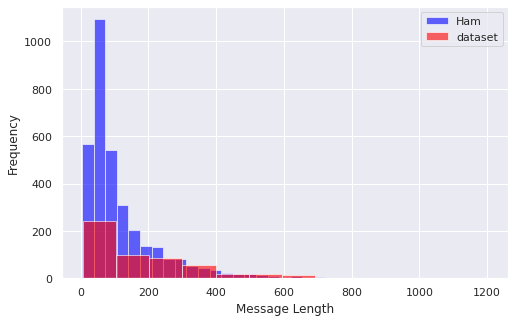

In [ ]:
plt.figure(figsize=(8, 5))
df[df.Label == 0].length.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
df[df.Label == 1].length.plot(kind='hist', color='red', label='dataset', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");

In [ ]:
import pandas as pd
import nltk
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.isna().sum()

Product_ID       0
Customer_Name    0
Customer_ID      0
Date             0
Rating           0
Label            0
Reviews          0
Sentiment        0
Features         0
length           0
dtype: int64

In [ ]:
df.head(3)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78


In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [ ]:
#The number of custoemrs 
len(df['Customer_ID'].value_counts())

2787

In [ ]:
#The number of custoemrs 
len(df['Product_ID'].value_counts())

1066

In [ ]:
df['Label'].value_counts()

0    3393
1     530
Name: Label, dtype: int64

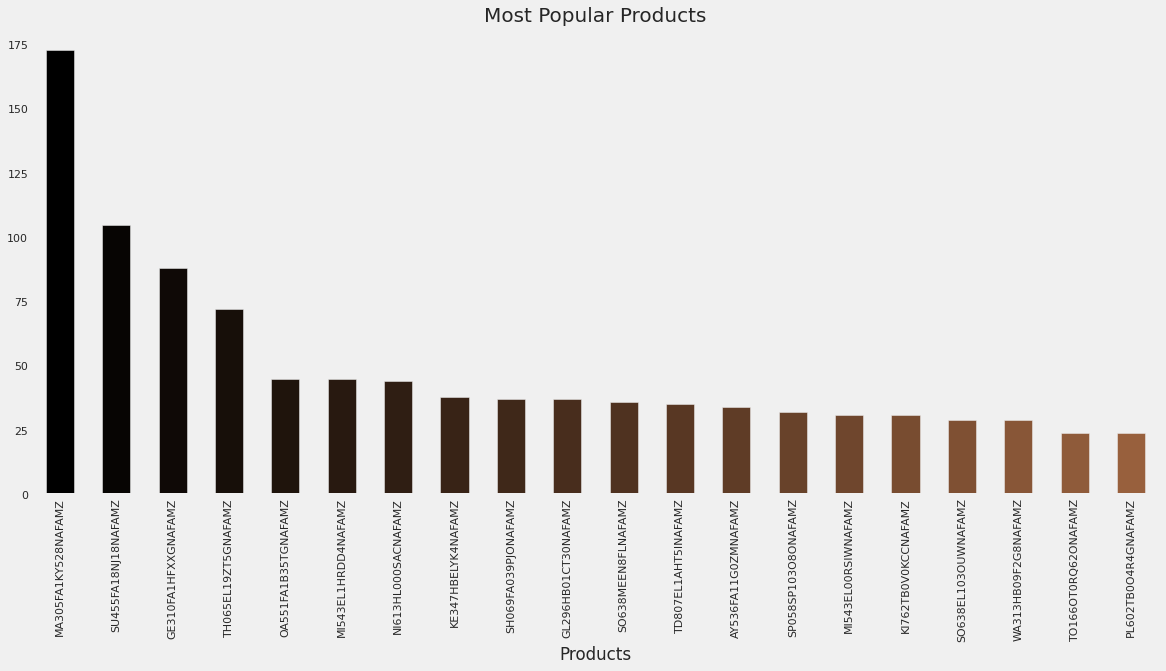

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('fivethirtyeight')

color = plt.cm.copper(np.linspace(0, 2, 80))
df['Product_ID'].value_counts().head(20).plot.bar(color = color)
plt.title('Most Popular Products', fontsize = 20, fontweight = 30)
plt.xlabel('Products')
plt.grid()
plt.show()

##Ratings for Spam and HAm REviews 

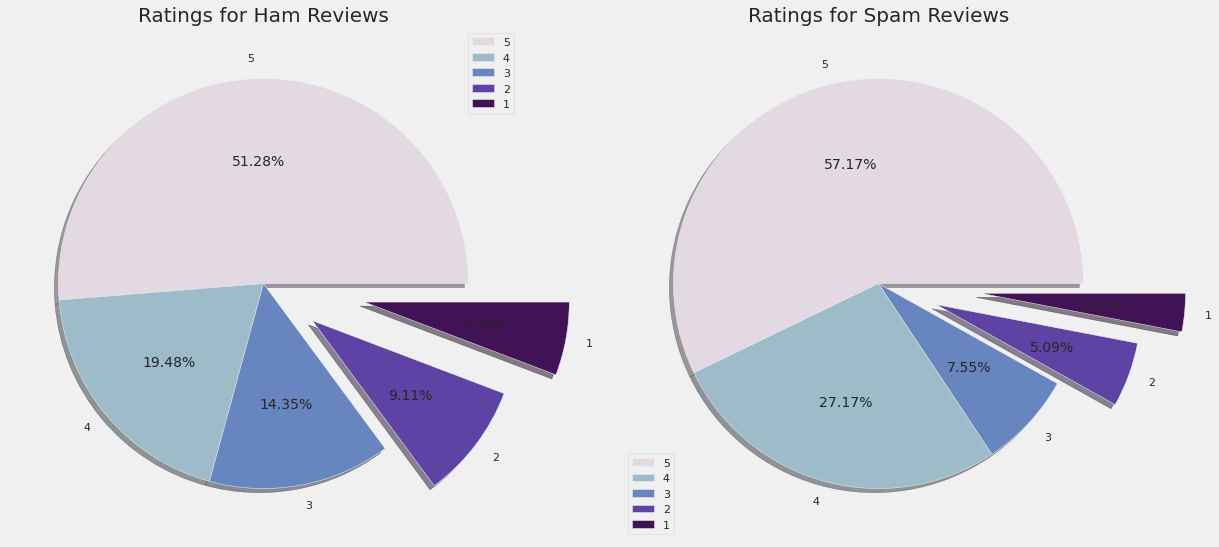

5    303
4    144
3     40
1     27
2     16
Name: Rating, dtype: int64
5    1740
4     661
1     487
3     309
2     196
Name: Rating, dtype: int64


In [ ]:
# plotting ratings of machine learning and python

plt.rcParams['figure.figsize'] = (18, 10)

rating = df['Rating'][df['Label'] == 0]
plt.subplot(1, 2, 1)
colors = plt.cm.twilight(np.linspace(0, 1, 10))
rating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Ham Reviews', fontsize = 20)
plt.legend()

pyrating = df['Rating'][df['Label'] == 1]

plt.subplot(1, 2, 2)
colors = plt.cm.twilight(np.linspace(0, 1, 10))
pyrating.value_counts().plot.pie(colors = colors,
                              labels = ['5', '4', '3', '2', '1'],
                               explode = [0, 0, 0, 0.3, 0.5],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Ratings for Spam Reviews', fontsize = 20)
plt.legend()
plt.show()
print(df['Rating'][df['Label'] == 1].value_counts())
print(df['Rating'][df['Label'] == 0].value_counts())

##Sentiment of Ham and Spam reviews 

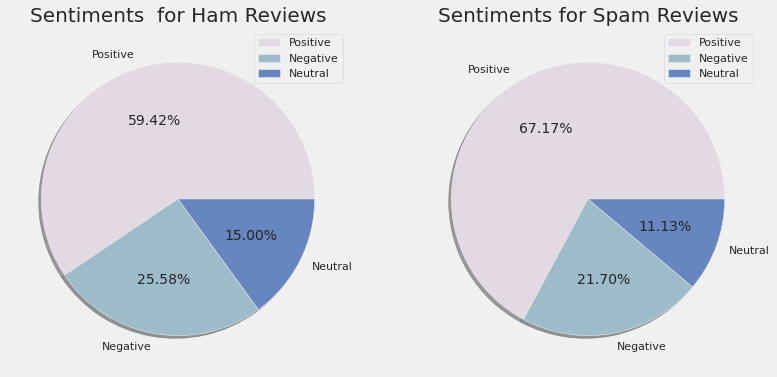

Sentiments for fake reviews
 Positive    356
Negative    115
Neutral      59
Name: Sentiment, dtype: int64
Sentiments for ham reviews
 Positive    2016
Negative     868
Neutral      509
Name: Sentiment, dtype: int64


In [ ]:
# plotting ratings of machine learning and python

plt.rcParams['figure.figsize'] = (12, 7)

rating = df['Sentiment'][df['Label'] == 0]
plt.subplot(1, 2, 1)
colors = plt.cm.twilight(np.linspace(0, 1, 10))
rating.value_counts().plot.pie(colors = colors,
                              labels = ['Positive', 'Negative', 'Neutral'],
                               explode = [0, 0, 0],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Sentiments  for Ham Reviews', fontsize = 20)
plt.legend()
pyrating = df['Sentiment'][df['Label'] == 1]

plt.subplot(1, 2, 2)
colors = plt.cm.twilight(np.linspace(0, 1, 10))
pyrating.value_counts().plot.pie(colors = colors,
                              labels = ['Positive', 'Negative', 'Neutral'],
                               explode = [0, 0, 0],
                              autopct = '%.2f%%', shadow = True)

plt.axis('off')
plt.title('Sentiments for Spam Reviews', fontsize = 20)
plt.legend()
# plt.savefig("sentiment.png")
plt.show()

print("Sentiments for fake reviews\n", df['Sentiment'][df['Label'] == 1].value_counts() )

print("Sentiments for ham reviews\n", df['Sentiment'][df['Label'] == 0].value_counts() )


# Data prepration 

In [ ]:
dataset = df

In [ ]:
dataset.shape

(3923, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923 entries, 0 to 3922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product_ID     3923 non-null   object        
 1   Customer_Name  3923 non-null   object        
 2   Customer_ID    3923 non-null   int64         
 3   Date           3923 non-null   datetime64[ns]
 4   Rating         3923 non-null   int64         
 5   Label          3923 non-null   int64         
 6   Reviews        3923 non-null   object        
 7   Sentiment      3923 non-null   object        
 8   Features       3923 non-null   object        
 9   length         3923 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 466.2+ KB


We have 86 961 words in the data:

In [ ]:
dataset.head()

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78
3,TE111EL1KXNGWNAFAMZ,Ghazanfar,1860,2017-10-06,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",218
4,SO638EL103OUWNAFAMZ,Murtaza iqbal,3778,2017-08-31,4,0,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle...",391


In [ ]:
dataset['Reviews'][1]

'aram sy pocket may aa jta hai aur quality b achi hai'

###Extracting Behavioral features

In [ ]:
user_rating_avg = {}
for user in dataset['Customer_ID']:
    user_dataset =dataset.loc[dataset['Customer_ID'] == user]
    count = 0
    rating_sum =0
    for rating in user_dataset['Rating']:
        count=count+1
        rating_sum = rating_sum+rating;
    
    avg = rating_sum/count
    user_rating_avg[user]=avg
    
prod_rating_avg = {}
for prod in dataset['Product_ID']:
    prod_dataset =dataset.loc[dataset['Product_ID'] == prod]
    count = 0
    rating_sum =0
    for rating in prod_dataset['Rating']:
        count=count+1
        rating_sum = rating_sum+rating;
    
    avg = rating_sum/count
    prod_rating_avg[prod]=avg

###Extracting Activity Window

In [ ]:
type(dataset['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
oldest = {}
latest = {}
act_window = []
c = 0
for user in dataset['Customer_ID']:
    user_dataset =dataset.loc[dataset['Customer_ID'] == user]
    print(user_dataset['Date'].min())
    oldest[user]=user_dataset['Date'].min()
    print(user_dataset['Date'].max())
    latest[user]=user_dataset['Date'].max()
    act_window.append((latest[user]-oldest[user]).days)
    c = c+1 
print(c)

Streaming output truncated to the last 5000 lines.
2016-04-25 00:00:00
2019-02-15 00:00:00
2019-02-15 00:00:00
2019-11-27 00:00:00
2019-11-27 00:00:00
2016-02-18 00:00:00
2016-02-18 00:00:00
2016-09-07 00:00:00
2019-12-24 00:00:00
2019-07-19 00:00:00
2019-07-19 00:00:00
2016-09-05 00:00:00
2016-09-05 00:00:00
2016-02-17 00:00:00
2020-01-21 00:00:00
2016-02-20 00:00:00
2016-02-20 00:00:00
2017-04-01 00:00:00
2017-04-01 00:00:00
2019-08-13 00:00:00
2019-08-13 00:00:00
2019-02-05 00:00:00
2019-02-05 00:00:00
2017-10-21 00:00:00
2017-10-21 00:00:00
2017-12-17 00:00:00
2017-12-17 00:00:00
2017-08-29 00:00:00
2017-08-29 00:00:00
2018-01-01 00:00:00
2018-01-01 00:00:00
2019-10-14 00:00:00
2019-10-14 00:00:00
2016-09-02 00:00:00
2016-09-02 00:00:00
2019-03-15 00:00:00
2019-03-15 00:00:00
2018-08-27 00:00:00
2018-08-27 00:00:00
2018-08-16 00:00:00
2018-08-16 00:00:00
2019-03-18 00:00:00
2019-03-18 00:00:00
2019-10-02 00:00:00
2019-10-02 00:00:00
2017-08-09 00:00:00
2018-08-22 00:00:00
2019-01-2

In [ ]:
dataset['Activity_window'] = act_window

##Extracting Review centric features 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
#------- Counting words in reviews ---------
word_counts = []
for review in dataset['Reviews']:
    count=0
    for word in str(review).split():
        count +=1
    word_counts.append(count)
dataset['words_counts'] = word_counts

# ---------------- Total Sentences Containg !  -----------------------
pp1 = []

for i in dataset['Reviews']:
    sent_exc_count=0
    for sent in sent_tokenize(i):
        if '!' in sent:
            sent_exc_count=sent_exc_count+1
    pp1.append(sent_exc_count/len(sent_tokenize(i)))
dataset['pp1'] = pp1

# --------------- Content Similarity ------------------------
content_similarity = []
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=1, stop_words="english") 
tfidf = vect.fit_transform(dataset['Reviews']) 
pairwise_similarity = tfidf * tfidf.T
for i in pairwise_similarity.toarray():
    sum_score= 0;
    count = 0
    for n in i:
        count=count+1
        sum_score=sum_score+n
    content_similarity.append(sum_score/count)
dataset['content_similarity'] = content_similarity



# ---------------- extremity of rating  -----------------------
ext_score = []
for i in dataset['Rating']:
    if(i>3 or i<2):
        ext_score.append(1)
    else:
                ext_score.append(0)
        
dataset['ext_score'] = ext_score

# --------------- Is Review Singleton ------------------------
IRS =[]
for i in dataset['Customer_ID']:
    if(len(dataset.loc[dataset['Customer_ID'] == i])>1):
        IRS.append(0)
    else:
        IRS.append(1)
        
dataset['IRS_score'] = IRS

# # --------------- Average Rating Deviation ------------------------
ARD_Score =[]
for user,prod in zip(dataset['Customer_ID'],dataset['Product_ID']):
    Ard_score = user_rating_avg[user] - prod_rating_avg[prod]
    ARD_Score.append(Ard_score)
dataset['ARD_Score'] = ARD_Score


# # --------------- Absolute Rating Deviation ------------------------
RD_Score =[]
for rating,prod in zip(dataset['Rating'],dataset['Product_ID']):
    Rd_score = rating - prod_rating_avg[prod]
    RD_Score.append(Rd_score)
dataset['RD_Score'] = RD_Score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Text Pre-processing

In the next step we clean text, remove stop words and apply stemming operation for each line of text:

In [ ]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
def clean_text(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)
def preprocessing(X):
  documents = []
  
  for sen in range(0, len(X)):
            # Remove next line 
      document = re.sub('\n', '', str(X[sen]))

      # Remove all the special characters
      document = re.sub(r'\W', ' ', document)
    
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)
    
      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)
      document = re.sub('nai', 'nahi', document)
      document = re.sub('nh', 'nahi', document)
      #document = re.sub('achi','acha', document)
 
      #remove repetaion character
      document = re.sub(r'([a-z])\1+', r'\1', document)

      # Converting to Lowercase
      document = document.lower()
      document = document.lstrip()
      document = document.rstrip()
      # Lemmatization
      documents.append(document)
  return documents


In [ ]:
dataset['Reviews_clean'] = dataset['Reviews'].apply(clean_text)
dataset.head(3)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,Activity_window,words_counts,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,0,11,0.0,0.051918,0,1,-2.000000,-2.000000,mil gya hai acha hai aur toota howa b nai hai
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,0,12,0.0,0.035987,1,1,0.466667,0.466667,aram sy pocket may aa jta hai aur quality b ac...
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,0,15,0.0,0.034319,0,1,-2.533333,-2.533333,sb sy achi chez apki customer service bhot ach...


In [ ]:
dataset['Reviews_clean'] = preprocessing(dataset['Reviews_clean'])
dataset.head(3)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,Activity_window,words_counts,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,0,11,0.0,0.051918,0,1,-2.000000,-2.000000,mil gya hai acha hai aur tota howa nahi hai
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,0,12,0.0,0.035987,1,1,0.466667,0.466667,aram sy pocket may a jta hai aur quality achi hai
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,0,15,0.0,0.034319,0,1,-2.533333,-2.533333,sb sy achi chez apki customer service bhot ach...


##Remove Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[::10])
porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from random import randint
def remove_stopwords(X):
  file = open('stopwords.txt')
  custom_list = ['ur', 'ise', 'iska', 'jab', 'may', 'aa', 'dia', 'bi', 'ha', 'mein', 'jee', 'ji', 'ke', 'hon','mujhe', 'usay', 'ye', 'un']
  stoplist = file.read().split() + custom_list + stop_words
  stoplist.remove('acha')
  stoplist.remove('nai')
 # stoplist.remove('nh')
#  stoplist.remove('nahi')
  
  # 'achi', 'Acha', 'Nh', 'nai', 'nahi', 'Nahi', 'Nai']
  # for e in stoplist:  
  #   if e in required:
  #       print(e)
  #       stoplist.remove(e)
  # #print(stoplist)
  cleaned = []
  for review in X:
    clean = [word for word in review.split() if word not in stoplist]
    cleaned.append(" ".join(clean))
  return cleaned


In [ ]:
dataset['Reviews_clean'] = remove_stopwords(dataset['Reviews_clean'].values)
dataset.head(3)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,Activity_window,words_counts,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,0,11,0.0,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,0,12,0.0,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,0,15,0.0,0.034319,0,1,-2.533333,-2.533333,achi chez apki customer service bhot achi prod...


##Extracting Sentimental features

In [ ]:
dataset['Sentiment_class'] = dataset['Sentiment']

In [ ]:
def custom_encoder(colum):
    data = colum
    data.replace(to_replace ="Positive", value =1, inplace=True)
    data.replace(to_replace ="Negative", value =0, inplace=True)
    data.replace(to_replace ="Neutral", value =0.5, inplace=True)
    return data
dataset["Sentiment_class"] = custom_encoder(dataset["Sentiment_class"])

##Extracting Other features from Reviews

In [ ]:
print(dataset['Reviews'].apply(lambda x: len(x.split(' '))).sum())
dataset.head(2)

97492


,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,Activity_window,words_counts,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean,Sentiment_class
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,0,11,0.0,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi,1.0
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,0,12,0.0,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi,1.0


In [ ]:
dataset['length_clean'] = dataset['Reviews_clean'].apply(len)
dataset.head(2)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,...,words_counts,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean,Sentiment_class,length_clean
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,...,11,0.0,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi,1.0,19
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,...,12,0.0,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi,1.0,28


In [ ]:
word_counts = []
for review in dataset['Reviews_clean']:
    count=0
    for word in str(review).split():
        count +=1
    word_counts.append(count)
dataset['words_clean'] = word_counts

In [ ]:
dataset.head(3)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,...,pp1,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean,Sentiment_class,length_clean,words_clean
0,TE111EL1KXNGWNAFAMZ,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,...,0.0,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi,1.0,19,4
1,MI543EL02ACXSNAFAMZ,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,...,0.0,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi,1.0,28,5
2,MI543EL02ACXSNAFAMZ,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,...,0.0,0.034319,0,1,-2.533333,-2.533333,achi chez apki customer service bhot achi prod...,1.0,58,9


In [ ]:
len(dataset[dataset['length_clean'] >500])

7

In [ ]:
dataset['Product_ID'] = dataset['Product_ID'].str[:8]
le = LabelEncoder()
dataset['pid_encoded'] = le.fit_transform(dataset['Product_ID'])


In [ ]:
dataset.head(4)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,...,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean,Sentiment_class,length_clean,words_clean,pid_encoded
0,TE111EL1,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,...,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi,1.0,19,4,539
1,MI543EL0,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,...,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi,1.0,28,5,336
2,MI543EL0,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,...,0.034319,0,1,-2.533333,-2.533333,achi chez apki customer service bhot achi prod...,1.0,58,9,336
3,TE111EL1,Ghazanfar,1860,2017-10-06,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",218,...,0.057272,0,0,0.000000,0.000000,back cover acha sai cuts soft acha lakin prote...,1.0,135,24,539


In [ ]:

dataset.head(30)

,Product_ID,Customer_Name,Customer_ID,Date,Rating,Label,Reviews,Sentiment,Features,length,...,content_similarity,ext_score,IRS_score,ARD_Score,RD_Score,Reviews_clean,Sentiment_class,length_clean,words_clean,pid_encoded
0,TE111EL1,itzmr7,6702,2019-11-09,1,0,mil gya hai acha hai aur toota howa b nai hai,Positive,['toota'],45,...,0.051918,0,1,-2.000000,-2.000000,acha tota howa nahi,1.0,19,4,539
1,MI543EL0,Afridi,396,2016-11-21,5,0,aram sy pocket may aa jta hai aur quality b ac...,Positive,"['aram', 'pocket', 'quality']",52,...,0.035987,1,1,0.466667,0.466667,aram pocket jta quality achi,1.0,28,5,336
2,MI543EL0,Muhammed,3710,2018-10-22,2,0,sb sy achi chez apki customer service bhot ach...,Positive,"['customer', 'products', 'orignal']",78,...,0.034319,0,1,-2.533333,-2.533333,achi chez apki customer service bhot achi prod...,1.0,58,9,336
3,TE111EL1,Ghazanfar,1860,2017-10-06,3,0,back cover acha hai sai cuts hai aur soft b ha...,Positive,"['back', 'cover', 'cuts', 'soft', 'protector',...",218,...,0.057272,0,0,0.000000,0.000000,back cover acha sai cuts soft acha lakin prote...,1.0,135,24,539
4,SO638EL1,Murtaza iqbal,3778,2017-08-31,4,0,shru may may thumb grip k khalif thi kyu k ext...,Negative,"['thumb', 'grip', 'chezy', 'stock', 'controlle...",391,...,0.037426,1,1,-0.275862,-0.275862,shru thumb grip khalif kyu extra chezy ad deti...,0.0,236,40,492
5,SO638EL1,Usman,5754,2016-02-14,5,0,may ny ya lya kyu k ya madad karti h acha karn...,Positive,"['madad', 'new', 'khel', 'pack']",301,...,0.030913,1,0,-1.486388,0.724138,lya kyu madad karti acha karni game khelo race...,1.0,179,37,492
6,SO638EL1,Rehan,4448,2019-05-18,4,0,mein neh shuru mein yeh haasil karne ki zahmat...,Positive,"['neh', 'haasil', 'barri', 'mansoobah', 'talaa...",277,...,0.059381,1,0,-0.775862,-0.275862,neh shuru hasil karne zahmat nahi lekin mere p...,1.0,172,29,492
7,ON533EL1,Aftab,405,2018-06-15,5,0,iss ka pura packge jis may naya chipset hai au...,Negative,"['packge', 'naya', 'chipset', 'keemat', 'samsu...",114,...,0.038303,1,0,1.083333,1.333333,pura packge jis naya chipset kemat bhot kam ba...,0.0,70,13,382
8,ON533EL1,Sikander,5264,2019-01-20,1,0,bohat mehanga kya hai mein iss price brikt mei...,Negative,"['mehanga', 'khareedon', 'qeemat', 'darmiyanay...",275,...,0.063313,0,0,-0.666667,-2.666667,bohat mehanga price brikt simsng kyun nahi kha...,0.0,186,29,382
9,ON533EL1,A compliment,34,2018-03-02,5,0,yeh duniya mein har jagah hai koi kharidari k...,Positive,"['kharidari', 'pehlay', 'haqeeqat']",85,...,0.034106,1,1,1.333333,1.333333,duniya har jagah kharidari karne pehlay haqeqa...,1.0,55,9,382


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 5000
maxlen=100
#vectorizer = CountVectorizer(max_features=max_feature)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(dataset['Reviews_clean'])

In [ ]:
tokenizer.word_index


{'nahi': 1,
 'bohat': 2,
 'acha': 3,
 'achi': 4,
 'kam': 5,
 'lekin': 6,
 'aik': 7,
 'miyar': 8,
 'qemat': 9,
 'istemal': 10,
 'sath': 11,
 'masnoat': 12,
 'daraz': 13,
 'ap': 14,
 'size': 15,
 'quality': 16,
 'chez': 17,
 'karta': 18,
 'bilkul': 19,
 'mere': 20,
 'mayar': 21,
 'pasand': 22,
 'order': 23,
 'sab': 24,
 'rang': 25,
 'karne': 26,
 'behtaren': 27,
 'terhan': 28,
 'thek': 29,
 'achay': 30,
 'sirf': 31,
 'waqai': 32,
 'bad': 33,
 'tor': 34,
 'waqt': 35,
 'aram': 36,
 'mutmaen': 37,
 'phone': 38,
 'khush': 39,
 'meri': 40,
 'asan': 41,
 'kia': 42,
 'mila': 43,
 'diya': 44,
 'ziyada': 45,
 'lakin': 46,
 'apne': 47,
 'bhot': 48,
 'din': 49,
 'shirts': 50,
 'sahi': 51,
 'kyunkay': 52,
 'jis': 53,
 'product': 54,
 'shukriya': 55,
 'mera': 56,
 'itna': 57,
 'tarsel': 58,
 'har': 59,
 'sakta': 60,
 'kisi': 61,
 'bar': 62,
 'aya': 63,
 'pehlay': 64,
 'price': 65,
 'lagta': 66,
 'munasib': 67,
 'da': 68,
 'hua': 69,
 'iski': 70,
 'agar': 71,
 'karte': 72,
 'kharab': 73,
 'batery': 74

#Saving the cleaned dataset

In [ ]:
#save clean data
dataset.to_csv('final_dataset_reviews_clean.csv', index=False)